In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/PyCharmProjects/ImageNet/'
os.chdir(root_path)

from datasets import *
from nets import *

device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
print(f"device: {device}")

Mounted at /content/gdrive
device: cuda:0


In [ ]:
with open('.//_Data/colab_dataset.pkl', 'rb') as f:
    full_dataset = pickle.load(f)

fold = 2
tds = HASYv2Dataset()
vds = HASYv2Dataset()
tds = tds.cross_val(fold, True, full_dataset)
vds = vds.cross_val(fold, False, full_dataset)
tds.to(device)
vds.to(device)
print(tds.device, vds.device)
print(len(tds), len(vds))
del full_dataset    # In order to avoid using all of the available memory

In [ ]:
# with open('.//_Reports/TwoLayerTest1 - 2021-11-12 16_34_06.229661/best_model.pkl', 'rb') as f:
#     model = pickle.load(f)

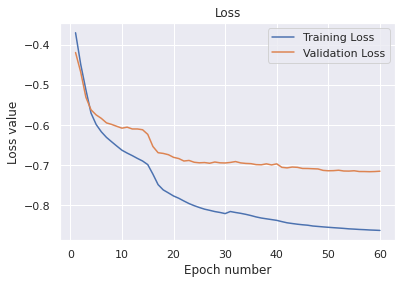

In [ ]:
# model.trainclass.plot()

1. Training loss: -0.8689
	Training accuracy: 86.91%
1. Validation loss: -0.7174
	Validation accuracy: 72.35%
2. Training loss: -0.8691
	Training accuracy: 86.93%
2. Validation loss: -0.7163
	Validation accuracy: 72.20%
3. Training loss: -0.8694
	Training accuracy: 86.95%
3. Validation loss: -0.7167
	Validation accuracy: 72.31%
4. Training loss: -0.8695
	Training accuracy: 86.97%
4. Validation loss: -0.717
	Validation accuracy: 72.28%
5. Training loss: -0.8697
	Training accuracy: 86.98%
5. Validation loss: -0.7166
	Validation accuracy: 72.29%
6. Training loss: -0.8698
	Training accuracy: 86.99%
6. Validation loss: -0.7157
	Validation accuracy: 72.20%
7. Training loss: -0.87
	Training accuracy: 87.02%
7. Validation loss: -0.7158
	Validation accuracy: 72.25%
8. Training loss: -0.8701
	Training accuracy: 87.03%
8. Validation loss: -0.7165
	Validation accuracy: 72.13%
9. Training loss: -0.8702
	Training accuracy: 87.03%
9. Validation loss: -0.7166
	Validation accuracy: 72.29%
10. Training 

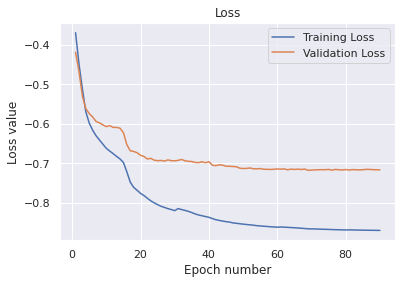

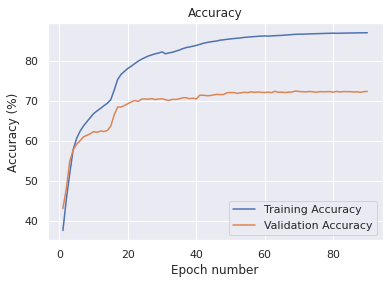

Time for running function train_model:
0.0 hours, 1.0 minutes and 53.47315073013306 seconds


In [ ]:
model = TwoLayer(dirname='TwoLayerTestGPU')
tdl = DataLoader(tds, batch_size = 100, shuffle=True)
vdl = DataLoader(vds, batch_size = 10000)
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))

1. Training loss: -0.8665
	Training accuracy: 86.68%
1. Validation loss: -0.7169
	Validation accuracy: 72.28%
2. Training loss: -0.8669
	Training accuracy: 86.73%
2. Validation loss: -0.7166
	Validation accuracy: 72.23%
3. Training loss: -0.8673
	Training accuracy: 86.76%
3. Validation loss: -0.7164
	Validation accuracy: 72.33%
4. Training loss: -0.8675
	Training accuracy: 86.78%
4. Validation loss: -0.7165
	Validation accuracy: 72.29%
5. Training loss: -0.8678
	Training accuracy: 86.81%
5. Validation loss: -0.7157
	Validation accuracy: 72.12%
6. Training loss: -0.8682
	Training accuracy: 86.84%
6. Validation loss: -0.7178
	Validation accuracy: 72.30%
7. Training loss: -0.8684
	Training accuracy: 86.86%
7. Validation loss: -0.7158
	Validation accuracy: 72.26%
8. Training loss: -0.8687
	Training accuracy: 86.90%
8. Validation loss: -0.7167
	Validation accuracy: 72.28%
9. Training loss: -0.8689
	Training accuracy: 86.92%
9. Validation loss: -0.7172
	Validation accuracy: 72.30%
10. Traini

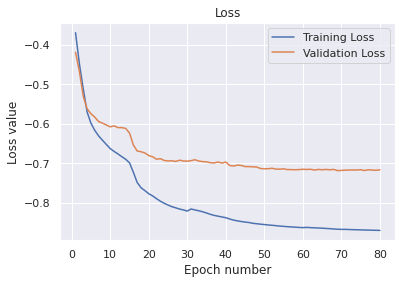

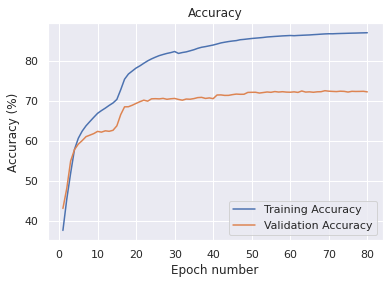

Time for running function train_model:
0.0 hours, 9.0 minutes and 58.28594446182251 seconds


In [ ]:
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))